In [19]:
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv("output.csv")

In [21]:
df2 = df.iloc[:,:2]
df2.head()
df2.rename(columns={'pc12':'param','pc21':'vals'}, inplace=True)
df2.head()

,param,vals
0,pc12,0.23
1,pc21,0.09
2,relaxation,0.32
3,Fnoise,0.30
4,scale,0.50


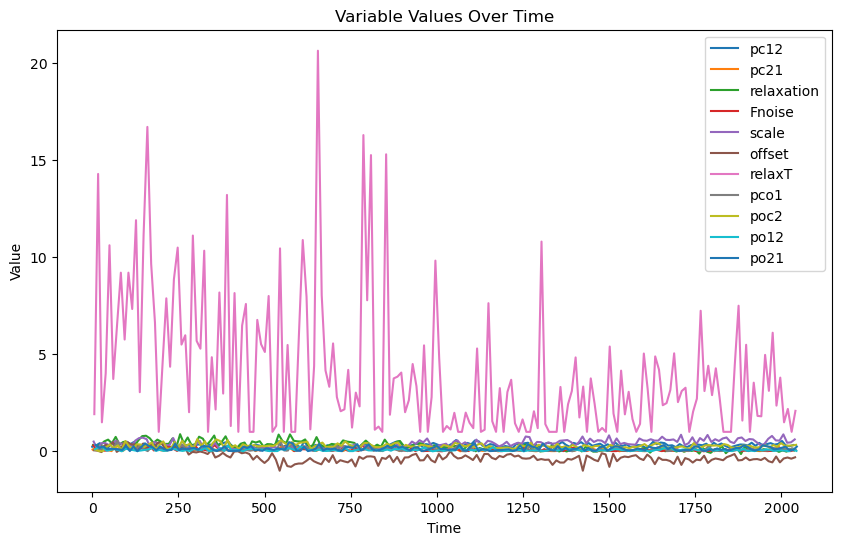

In [22]:
plt.figure(figsize=(10, 6))

# Loop through each unique variable and plot its values
for variable in df2['param'].unique():
    subset = df2[df2['param'] == variable]
    plt.plot(subset['vals'], label=variable)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Variable Values Over Time')
plt.legend()
plt.show()


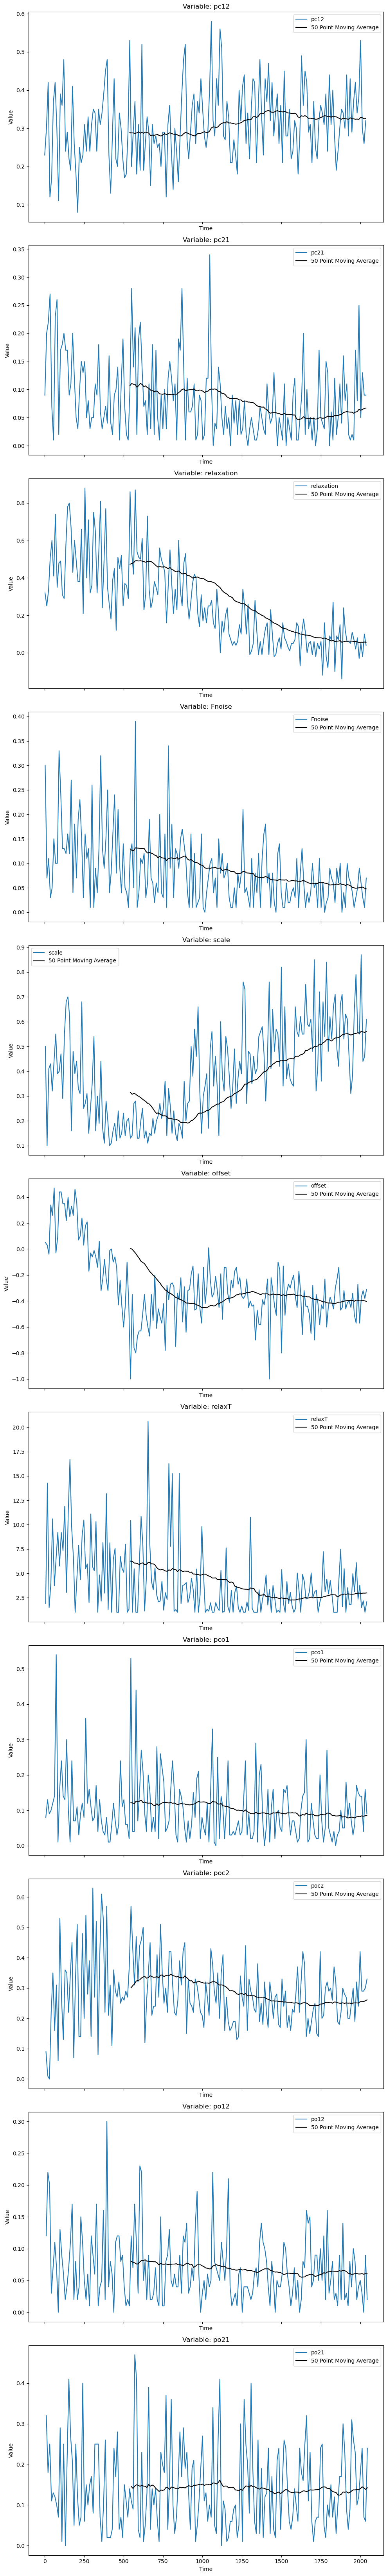

In [23]:

# Get unique variables
unique_vars = df2['param'].unique()
num_vars = len(unique_vars)
dist = 50
# Create subplots
fig, axes = plt.subplots(num_vars, 1, figsize=(10, 6 * num_vars), sharex=True)

# Loop through each unique variable and plot its values with a smooth black line showing the 10-point moving average
for i, variable in enumerate(unique_vars):
    subset = df2[df2['param'] == variable]
    axes[i].plot(subset['vals'], label=variable)
    # Calculate and plot the moving average
    moving_avg = subset['vals'].rolling(window=dist).mean()
    axes[i].plot(moving_avg, color='black', label=f'{dist} Point Moving Average')
    axes[i].set_title(f'Variable: {variable}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [24]:
subset

,param,vals
10,po21,0.32
21,po21,0.18
32,po21,0.25
43,po21,0.11
54,po21,0.13
...,...,...
2001,po21,0.18
2012,po21,0.24
2023,po21,0.07
2034,po21,0.06
